In [857]:
import matplotlib.pyplot as plt
import numpy as np
from ruptures import Dynp, Pelt
import pandas as pd
from scipy.stats import median_abs_deviation
from src import CPOP
from src.utils import compute_costs, linear_segment_cost, log_segment_cost, precompute_sums
from src.coefficients import get_segment_coefficients, get_recursive_coefficients

In [858]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1039]:
n = 100
sigma = 1

# create a pice-wise linear signal
phis = [0, 50, 25, 100]
taus = [0, n // 3, 2 * n // 3, n]

signal = np.zeros(n)
for i in range(len(taus) - 1):
    for t in range(taus[i], taus[i + 1]):
        signal[t] = phis[i] + (phis[i + 1] - phis[i]) / (taus[i + 1] - taus[i]) * (
            t - taus[i]
        )

np.random.seed(42)
signal += np.random.normal(loc=0, scale=sigma, size=n)

In [1040]:
y_cumsum, y_linear_cumsum, y_squarred_cumsum = precompute_sums(signal)

cp1, cp2 = 50, 99
h = log_segment_cost(1)
coeffs0, phi_prime0 = get_segment_coefficients(signal, cp1 + 1, 1, h, return_phi_prime=True)
coeffs1, phi_prime1 = get_recursive_coefficients(cp1+1, coeffs0, y_cumsum, y_linear_cumsum, y_squarred_cumsum, cp2+1, 1, 1, h, return_phi_prime=True)
a_, b_, c_ = coeffs1
phi = -b_ / (2 * c_)
phi1 = phi_prime1[0] + phi_prime1[1] * phi
phi0 = phi_prime0[0] + phi_prime0[1] * phi1

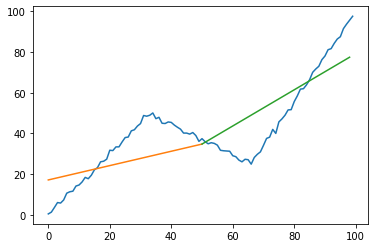

In [1041]:
C0 = (phi1 - phi0)/(cp1)
approx0 = (np.arange(0, cp1+1))*C0 + phi0

C1 = (phi - phi1)/(cp2 - cp1)
approx1 = (np.arange(cp1, cp2) - cp1)*C1 + phi1
# test = signal[cp1:cp2] - approx
plt.plot(signal)
plt.plot(np.arange(0, cp1+1), approx0)
plt.plot(np.arange(cp1, cp2), approx1)
plt.show()
# np.sum(test[1:] ** 2) + np.log(cp1 - 1)

In [1052]:
total_cost = 0
C0 = (phi1 - phi0)/(cp1+1)
for i in range(0, cp1+1):
    total_cost += (signal[i] - phi0 - C0 * (i + 1))**2

In [1043]:
# total_cost += np.log(cp1 + 1)

In [1057]:
C0 = (phi1 - phi0)/(cp1+1)
approx0 = (np.arange(1, cp1+2))*C0 + phi0

C1 = (phi - phi1)/(cp2 - cp1)
approx1 = (np.arange(cp1+1, cp2+1) - cp1)*C1 + phi1

print(np.sum((signal[:cp1+1] - approx0)**2))

6936.209954828721


In [1058]:
print(compute_costs(coeffs0.reshape(1, -1), phi = phi1))
print(total_cost)
print((compute_costs(coeffs0.reshape(1, -1), phi = phi1) - total_cost))

[6936.20995483]
6936.209954828721
[-1.8189894e-12]


In [1047]:
total_cost = compute_costs(coeffs0.reshape(1, -1), phi = phi1)[0]# + np.log(cp1 + 1)
C1 = (phi - phi1)/(cp2 - cp1)
approx1 = (np.arange(cp1+1, cp2+1) - cp1)*C1 + phi1
# assert len(approx1) == cp2 - cp1
# assert len(signal[cp1:cp2]) == cp2 - cp1 +1
# assert(approx1[0] == phi1)
# assert(approx1[-1] == phi)

for i in range(cp1+1, cp2+1):
    total_cost += (signal[i] - phi1 - C1 * (i - cp1))**2

print(total_cost + np.log(cp2 - cp1) + 1)

15217.760706919555


In [1048]:
np.sum((approx1 - signal[cp1+1:cp2+1])**2) + np.log(cp2 - cp1) + compute_costs(coeffs0.reshape(1, -1), phi = phi1)[0] + 1

15217.760706919551

In [1061]:
C0 = (phi1 - phi0)/(cp1+1)
approx0 = (np.arange(1, cp1+2))*C0 + phi0

C1 = (phi - phi1)/(cp2 - cp1)
approx1 = (np.arange(cp1+1, cp2+1) - cp1)*C1 + phi1

approx = np.concatenate([approx0, approx1])

np.sum((approx - signal)**2) + np.log(cp2 - cp1) + 1

15217.760706919553

In [1049]:
print(compute_costs(coeffs1.reshape(1, -1), phi = phi))
# print(compute_costs(coeffs0.reshape(1, -1), phi = phi1))

[15217.76070692]
